In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import ticker
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10, 8)

RELOAD = True

In [3]:
if RELOAD:
    from importlib import reload
    try:
        reload(recopilar_data)
    except NameError:
        import recopilar_data
    

data_raw = pd.read_csv('alldata.dat', sep='\s+')

data_raw.head(10)

,densidad,temperatura,job,potencial_mean,potencial_std,cinetica_mean,cinetica_std,total_mean,total_std,presion_mean,presion_std
0,0.673,0.9,2,-809.806455,10.273375,270.072496,15.497441,-539.733959,18.129004,0.067955,0.221762
1,0.673,0.9,3,-810.617976,11.009377,269.985055,16.453366,-540.632921,19.941859,0.059607,0.232876
2,0.673,0.9,5,-811.304908,10.375172,268.815463,15.571185,-542.489446,18.810635,0.058617,0.219769
3,0.673,0.9,4,-810.640389,10.262373,269.802593,16.255036,-540.837796,19.120741,0.047876,0.218001
4,0.673,0.9,1,-811.254393,10.589446,269.567292,15.837404,-541.687101,19.180314,0.047001,0.232172
5,0.673,0.9,6,-809.322635,10.597064,272.307338,16.932791,-537.015297,20.065307,0.073275,0.229063
6,0.673,2.0,2,-688.596716,20.177752,599.159525,36.105062,-89.437190,42.061886,3.090401,0.398947
7,0.673,2.0,3,-689.203983,20.110766,598.967632,34.364743,-90.236351,41.010226,3.066846,0.393052
8,0.673,2.0,5,-689.244690,20.093394,596.351154,34.424683,-92.893537,39.837250,3.065842,0.380189
9,0.673,2.0,4,-689.014084,19.735383,601.008450,34.257511,-88.005634,37.762453,3.061663,0.395001


In [4]:
data = data_raw.groupby(['densidad','temperatura'], as_index=False).mean().drop('job', axis=1)
data.head()

,densidad,temperatura,potencial_mean,potencial_std,cinetica_mean,cinetica_std,total_mean,total_std,presion_mean,presion_std
0,0.001,0.9,-1.735439,1.068218,269.470737,15.539583,267.735298,15.558850,0.000895,0.000014
1,0.001,1.1,-1.505481,1.006105,330.185943,19.358662,328.680462,19.407837,0.001096,0.000015
2,0.001,2.0,-1.128860,0.935121,599.230075,34.635847,598.101215,34.641288,0.001999,0.000020
3,0.010,0.9,-17.276743,3.425908,269.806807,15.472043,252.530065,15.730779,0.008554,0.000471
4,0.010,1.1,-14.692543,3.175014,329.942295,18.917555,315.249752,19.160157,0.010642,0.000500


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


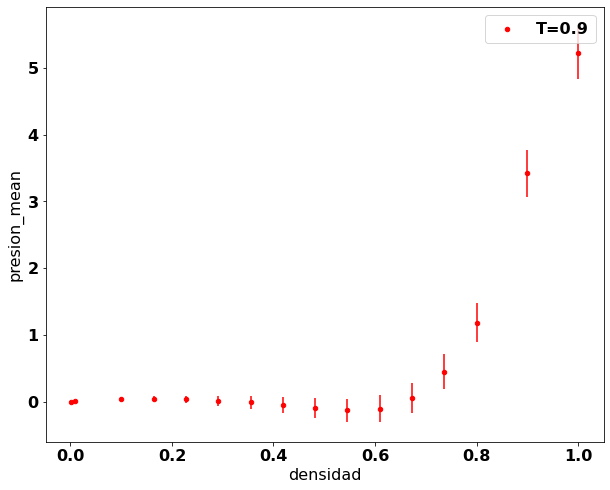

In [5]:
fig, ax = plt.subplots()

temps = [0.9] #, 1.1, 2.0]
colors = 'rgb'

for temp, color in zip(temps, colors): #data['temperatura'].unique():
    data2 = data[data['temperatura']==temp]
    data2.plot(
        'densidad', 'presion_mean', yerr='presion_std', color=color,
        kind='scatter', label=f'T={temp}', ax=ax
        )